In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
!pip install keras
!pip install tensorflow

In [9]:
prices = pd.read_csv('/content/FB-stock-prices.csv')
prices.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [10]:
dtypes = prices.dtypes
print(dtypes)

Date     object
Price     int64
dtype: object


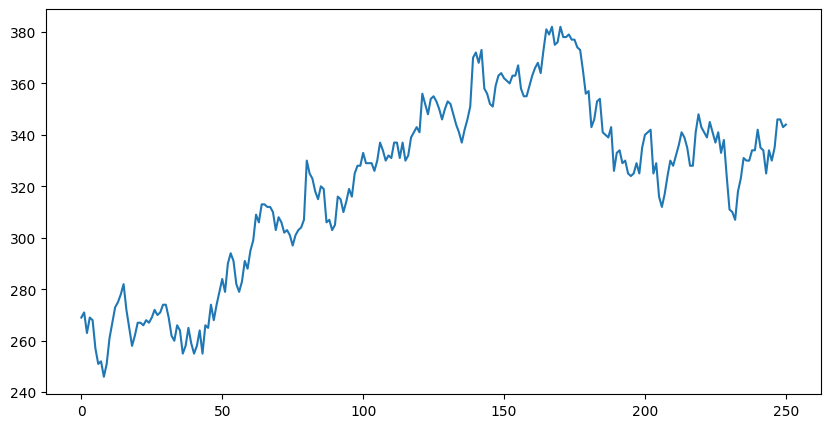

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(prices['Price'])
plt.show()

#Data Preprocesssing

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices['Price'].values.reshape(-1, 1))

In [13]:
#print(scaled_prices)

In [13]:
total_size = len(scaled_prices)
test_size = 50
train_size = total_size-test_size
print(total_size, train_size)

251 201


In [15]:
x_train = scaled_prices[:train_size]
x_test = scaled_prices[train_size:]

In [16]:
print (x_train.shape)

(201, 1)


In [17]:
def create_rnn_data(data, lookback=1):
  data_x, data_y = [], []
  for i in range(len(data)-lookback-1):
    data_x.append(data[i:(i+lookback), 0])
    data_y.append(data[i+lookback, 0])
  return np.array(data_x), np.array(data_y)

In [19]:
lookback = 25
data_x, data_y = create_rnn_data(x_train, lookback)


In [20]:
data_x.shape

(175, 25)

In [22]:
data_y.shape

(175,)

In [23]:
data_x = np.reshape(data_x, (data_x.shape[0],1, data_x.shape[1]))

In [24]:
data_x.shape

(175, 1, 25)

In [26]:
from keras.models import Sequential
from keras.layers import SimpleRNN ,Dense
import tensorflow as tf
tf.random.set_seed(3)

In [32]:
price_model = Sequential()
price_model.add(SimpleRNN(32, input_shape=(1, lookback)))
price_model.add(Dense(1))

#optimizer and loss
price_model.compile(optimizer='adam', loss='mean_squared_error', metrics= ['accuracy','mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
price_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
price_model.fit(data_x, data_y, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0014 - loss: 1.5066 - mse: 1.5066    
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0144 - loss: 0.0379 - mse: 0.0379
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0144 - loss: 0.0124 - mse: 0.0124
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0144 - loss: 0.0111 - mse: 0.0111
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0144 - loss: 0.0100 - mse: 0.0100


In [35]:
x_test, y_test = create_rnn_data(x_test, lookback)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [36]:
price_model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.0000e+00 - loss: 0.0102 - mse: 0.0102


[0.010158689692616463, 0.0, 0.010158689692616463]

In [37]:
price_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


array([[0.74912214],
       [0.7269752 ],
       [0.6195542 ],
       [0.58185375],
       [0.63007486],
       [0.651031  ],
       [0.68050575],
       [0.61712515],
       [0.62553847],
       [0.676366  ],
       [0.72765553],
       [0.80085665],
       [0.7654018 ],
       [0.7879473 ],
       [0.7472569 ],
       [0.6621691 ],
       [0.683655  ],
       [0.5888776 ],
       [0.589113  ],
       [0.622775  ],
       [0.67863727],
       [0.7936048 ],
       [0.817359  ],
       [0.81397206]], dtype=float32)

In [38]:
scaler.inverse_transform(price_model.predict(x_test))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[347.8806 ],
       [344.86862],
       [330.2594 ],
       [325.1321 ],
       [331.6902 ],
       [334.54022],
       [338.5488 ],
       [329.92902],
       [331.0732 ],
       [337.98578],
       [344.96115],
       [354.9165 ],
       [350.09467],
       [353.16083],
       [347.62692],
       [336.055  ],
       [338.97708],
       [326.08737],
       [326.1194 ],
       [330.69742],
       [338.29468],
       [353.93027],
       [357.16083],
       [356.7002 ]], dtype=float32)

#predictions

In [43]:
'''prev_prices = np.array([300, 301, 302, 303, 304, 305, 306,
                       307, 308, 309, 310, 311, 312, 313,
                       314, 3,32515, 316, 317, 318, 319, 320,
                       321, 322, 323, 324])
scaled_prices = scaler.fit_transform(prev_prices.reshape(-1, 1))
np.reshape(scaled_prices, (1, 1, -1))'''

array([[[0.00913509, 0.00916585, 0.0091966 , 0.00922736, 0.00925812,
         0.00928888, 0.00931964, 0.00935039, 0.00938115, 0.00941191,
         0.00944267, 0.00947343, 0.00950418, 0.00953494, 0.0095657 ,
         0.        , 1.        , 0.00962721, 0.00965797, 0.00968873,
         0.00971949, 0.00975025, 0.009781  , 0.00981176, 0.00984252,
         0.00987328]]])

In [45]:
prev_prices = np.array([300, 301, 302, 303, 304, 305, 306,
                       307, 308, 309, 310, 311, 312, 313,
                       314, 325, 316, 317, 318, 319, 320,
                       321, 322, 323, 324])
scaled_prices = scaler.fit_transform(prev_prices.reshape(-1, 1))
pred = price_model.predict(np.reshape(scaled_prices, (1, 1, lookback)))
stock_pred = scaler.inverse_transform(pred)
print(stock_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[310.54907]]
